# Importing Libraries

In [1]:
# Importing Libraries for data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import ttest_ind
from scipy.stats import yeojohnson

# libraries for feature engineering
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import FunctionTransformer, PowerTransformer

# libraries for dataset splits
from sklearn.model_selection import train_test_split

# libraries for machine learning models
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

# libraries for machine learning model output 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# libraries for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# model dump
import joblib

import warnings
warnings.filterwarnings("ignore")

# Importing Data

In [3]:
df = pd.read_csv('feature_transformed_data.csv')
df.head(3)

,Age,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Sex_Male,Heart Disease_Presence
0,4.262680,16.0,4.875197,5.777652,0.0,9.0,4.700480,0.0,5.76,4.0,9.0,9.0,1.0,1.0
1,4.219508,9.0,4.753590,6.005984,0.0,9.0,5.081404,0.0,2.56,4.0,0.0,49.0,0.0,0.0
2,4.060443,4.0,4.828314,5.568345,0.0,1.0,4.955827,0.0,0.09,1.0,0.0,49.0,1.0,1.0


In [4]:
df.columns

Index(['Age', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Sex_Male',
       'Heart Disease_Presence'],
      dtype='object')

# Predictive Modelling

## 1. Splitting Data into Features and Target

In [5]:
# Splitting the data into dependant and independant variables
x = df.drop(['Heart Disease_Presence'], axis=1)
y = df['Heart Disease_Presence']

In [6]:
# splitting the dependant and independant variables into test and train variables
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [7]:
print("Training Variable")
print(x_train.shape)
print(y_train.shape)

print("Testing Variable")
print(x_test.shape)
print(y_test.shape)

Training Variable
(240, 13)
(240,)
Testing Variable
(60, 13)
(60,)


In [8]:
# Define a list of classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Multi-layer Perceptron': MLPClassifier(),
    'AdaBoost': AdaBoostClassifier()
    }

# Train each classifier and evaluate its accuracy
results = {}
for name, clf in classifiers.items():
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Select the classifier with the highest accuracy
best_classifier = max(results, key=results.get)
best_accuracy = results[best_classifier]

print("\n---------Results--------------\n")
for name, accuracy in results.items():
    print(f"{name}: Accuracy - {accuracy}")

print("\n---------Best Algorithm and Accuracy--------------")
print(f"\nBest Classifier: {best_classifier} with Accuracy - {best_accuracy}")


---------Results--------------

Random Forest: Accuracy - 0.85
K-Nearest Neighbors: Accuracy - 0.8666666666666667
Support Vector Machine: Accuracy - 0.8333333333333334
Logistic Regression: Accuracy - 0.9166666666666666
Gaussian Naive Bayes: Accuracy - 0.9166666666666666
Decision Tree: Accuracy - 0.85
Gradient Boosting: Accuracy - 0.85
Multi-layer Perceptron: Accuracy - 0.9
AdaBoost: Accuracy - 0.8333333333333334

---------Best Algorithm and Accuracy--------------

Best Classifier: Logistic Regression with Accuracy - 0.9166666666666666


# 2. Selecting the best accuracy algorithm - Logistic Regression 

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

# 3. Results of Model Output

In [17]:
# Prediciting the output for test dataset
y_pred = model.predict(x_test)

In [18]:
# Classification report for random forest classifier
classification_reports = classification_report(y_test, y_pred)
print(classification_reports)

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92        32
         1.0       0.87      0.96      0.92        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [19]:
# Confusion matrix 
res = confusion_matrix(y_test, y_pred)
print(res)

[[28  4]
 [ 1 27]]


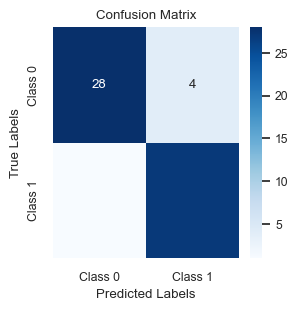

In [20]:
# Define class labels
classes = ['Class 0', 'Class 1']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3, 3))
sns.set(font_scale=0.8)  # Adjust font size for better readability
sns.heatmap(res, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [21]:
# Score for model
model.score(x_test, y_test)

0.9166666666666666

# 4. Hyperparameter Tuning

## 4.1 Finding the Optimum Parameters with Randomized Search CV

In [22]:
params = {'solver':['newton-cg', 'sag', 'saga'], 
         'penalty' :['none','l2' ]}
rf_randomcv = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=5, verbose=2)
rf_randomcv.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .....................penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....................penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....................penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....................penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....................penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...........................penalty=none, solver=sag; total time=   0.0s
[CV] END ...........................penalty=none, solver=sag; total time=   0.0s
[CV] END ...........................penalty=none, solver=sag; total time=   0.0s
[CV] END ...........................penalty=none, solver=sag; total time=   0.0s
[CV] END ...........................penalty=none, solver=sag; total time=   0.0s
[CV] END ..........................penalty=none, solver=saga; total time=   0.0s
[CV] END ..........................penalty=none, 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100,
                   param_distributions={'penalty': ['none', 'l2'],
                                        'solver': ['newton-cg', 'sag', 'saga']},
                   verbose=2)

## Get the best hyperparameters from RandomizedSearchCV`

In [23]:
best_params_random = rf_randomcv.best_params_
print(best_params_random)

{'solver': 'newton-cg', 'penalty': 'l2'}


## Training Model with Best Parameters

In [24]:
model = LogisticRegression(solver='newton-cg', penalty='l2')
model.fit(x_train, y_train)

LogisticRegression(solver='newton-cg')

In [25]:
# Prediciting the output for test dataset
y_pred = model.predict(x_test)

In [26]:
# Classification report for random forest classifier
classification_reports = classification_report(y_test, y_pred)
print(classification_reports)

              precision    recall  f1-score   support

         0.0       0.97      0.88      0.92        32
         1.0       0.87      0.96      0.92        28

    accuracy                           0.92        60
   macro avg       0.92      0.92      0.92        60
weighted avg       0.92      0.92      0.92        60



In [27]:
# Confusion matrix 
res = confusion_matrix(y_test, y_pred)
print(res)

[[28  4]
 [ 1 27]]


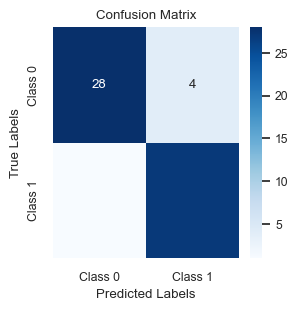

In [28]:
# Define class labels
classes = ['Class 0', 'Class 1']

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(3, 3))
sns.set(font_scale=0.8)  # Adjust font size for better readability
sns.heatmap(res, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)

# Add labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [29]:
# Export the trained model
joblib.dump(model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']